# Data Cleaning 🚮



En análisis de datos, aproximadamente del 60% al 80% del tiempo es invertido en limpiar y organizar los datos, y con justa razón, pues la limpieza de datos es la etapa previa al interrogatorio que llevaremos a cabo posteriormente para obtener información. Este proceso rara vez se realiza en una sola ocasión, suele ser un proceso iterativo.
En esta lectura, abordaremos algunos de los casos más comunes de "datos sucios" y cómo afrontarlos.


 Nuestros Paquetes

* import pandas as pd   - Tratamiento de datos

* import numpy as np    - Biblioteca numerica de python

Paquetería nueva

* import [datetime](https://docs.python.org/3/library/datetime.html)       - Manejo y tratamiento de Fechas
* import [chardet ](https://pypi.org/project/chardet/)       - Modulo de Encoding para caracteres    



Nuestros Datasets

* Dataset Derrumbes By NASA (https://www.kaggle.com/nasa/landslide-events)
* Dataset Terremotos By Us Geological Survey (https://www.kaggle.com/usgs/earthquake-database)
* Dataset Fifa By Karan Gadiya (https://www.kaggle.com/karangadiya/fifa19/)
* Dataset Adult By Ronny Kohavi and Barry Becker (http://archive.ics.uci.edu/ml/datasets/Adult)
* Dataset Kickstarter By Mickaël Mouillé obtained with Kickstarter Platform API (https://www.kaggle.com/kemical/kickstarter-projects)

Instruciones:  Descarga las bases de datos de terremotos.csv, derrumbes.csv, fifa.csv, fifaM.csv, adult.csv, accounts.csv, snsdata.csv', kickstarter-encoding.csv, PoliceKillingUS.csv, accounts.csv de https://drive.google.com/drive/folders/1RL-IyUCPHH3iCs3AVjP3g3O_hnBVLaeD

In [4]:
import pandas as pd   #Tratamiento de datos
import numpy as np    #Operar numericamente sobre datos
import seaborn as sns #data visualization library
import datetime       #Manejo y tratamiento de Fechas
import chardet        #Detectar el encoding de caracteres


In [7]:
earthquakes = pd.read_csv('terremotos.csv')
derrumbes = pd.read_csv('derrumbes.csv')
fifa = pd.read_csv('fifa.csv')
fifaM = pd.read_csv('fifaM.csv')
adult = pd.read_csv('adult.csv')
accounts = pd.read_csv('accounts.csv')
chavos_prepa = pd.read_csv('snsdata.csv')

FileNotFoundError: ignored

## ¿Cómo manejar y transformar las fechas?

Primero vamos a ver en qué formato están guardadas con 
[.dtype ](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

Data type objects

* 'b'       boolean
* 'i'       (signed) integer
* 'u'       unsigned integer
* 'f'       floating-point
* 'c'       complex-floating point
* 'O'       (Python) objects
* 'S', 'a'  (byte-)string
* 'U'       Unicode
* 'V'       raw data (void)




In [ ]:
# Veamos un ejemplo de cómo se aplica con los datos de derrumbes
# Vamos a utilizar para las fechas datasets con terremotos entre 1965 y 2016 y con Derrumbes enre 2007 y 2016
derrumbes.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
derrumbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [ ]:
# Checar Tipo de Dato de la columna fecha en los derrumbes
derrumbes['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [ ]:
# dtype: object Pandas usa el Object para referirse a varios tipos de datos pero normalmente son strings
derrumbes['date'].dtype

dtype('O')

[**to_datetime()** ](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) es un método que ayuda a convertir strin en un formato de date que puede leer python como fechas

**Syntax**:

pandas.to_datetime(arg, format=None, ...)

 
Parameters:

* arg: An integer, string, float, list or dict object to convert in to Date time object.
* format: String input to tell position of day, month and year.




In [ ]:
# Transformar a fechas de a devis
derrumbes['date_parsed'] = pd.to_datetime(derrumbes['date'], format = "%m/%d/%y")
derrumbes['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
#Podemos interactuar con las partes de la fecha
dia_del_mes_derrumbes = derrumbes['date_parsed'].dt.day
dia_del_mes_derrumbes

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

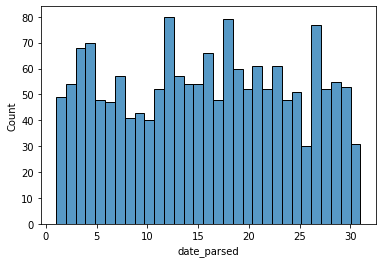

In [ ]:
# Grafiquemos para double-check
# doesn't hurt to double-check that the days of the month we've extracted make sense.

dia_del_mes_derrumbes = dia_del_mes_derrumbes.dropna()  #Quitar espacios vacios
sns.histplot(dia_del_mes_derrumbes, bins=31)

### Ahora te toca a ti!

* Crea una nueva columna llamada '**mes_derrumbes**' que **muestre** los meses de la columna **date_parsed** en que sucedieron los derrumbes.
* Después muestra de esa columna los datos del mes.

In [ ]:
#Escribe aquí tu código






### ¿Qué pasa si la fecha de un Dataset viene en varios Formatos???


Entonces usaremos el parámetro de **infer_datetime_format=True**
de la función **to_datetime**

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html


In [ ]:
#por ejemplo en los datos de account
accounts

,Unnamed: 0,id,date_opened,total
0,1,A880C79F,2003-10-19,169305
1,2,BE8222DF,"October 05, 2018",107460
2,3,19F9E113,2008-07-29,15297152
3,4,A2FE52A3,2005-06-09,14897272
4,5,F6DC2C08,2012-03-31,124568
...,...,...,...,...
93,94,65EAC615,"February 20, 2004",140191
94,95,6C7509C9,"September 16, 2000",212089
95,96,BD969A9D,2007-04-29,167238
96,97,B0CDCE3D,"May 28, 2014",145240


In [ ]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   98 non-null     int64 
 1   id           98 non-null     object
 2   date_opened  98 non-null     object
 3   total        98 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
# Notilla extra, si en la columna a parsear hay varios tipos de formato de fecha, mejor decirle al python que la infiera
#te toca a ti! escribe tu código




accounts['date_opened_parsed'] = pd.to_datetime(accounts['date_opened'],infer_datetime_format=True)
accounts['date_opened_parsed']



0    2003-10-19
1    2018-10-05
2    2008-07-29
3    2005-06-09
4    2012-03-31
        ...    
93   2004-02-20
94   2000-09-16
95   2007-04-29
96   2014-05-28
97   2007-10-14
Name: date_opened_parsed, Length: 98, dtype: datetime64[ns]

In [ ]:
#No se le da un formato deseado, por ejemplo poner dia/mes/anio. 
#Esto porque su funcion es trabajarlos como datos tipo fecha, 
#asi como los numeros no se les ven con comas despues de las centenas.

##Remover y reemplazar y modificar caracteres no deseados

Otro problema común es la presencia de caracteres que no deseamos en nuestros valores. Estos pueden constituir alguno de los siguientes casos:

Caracteres erróneos introducidos por error humano o error de máquina al realizar los registros.
Caracteres que fueron introducidos para indicar una divisa, unidad de medida, categoría, etc. O bien para simplificar los datos.
Caracteres erróneos introducidos por una cambio en la codificación de nuestro sistema respecto a la codificación de los datos.

In [ ]:
#por ejemplo en esta dataset http://archive.ics.uci.edu/ml/datasets/Adult
adult

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
adult.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
## Quiero quitar los espacios en blanco que aparecen antes del nombre de cada columna
## ¿Como lo haria?

#Escribe tu codigo aqui

## Otros tipos de caracteres no deseados
A veces hay otro tipo de caracteres no identificados o deseados

In [ ]:
#Por ejemplo, aca con este dataset
fifa

In [ ]:
#Veamos su estructura
fifa.info()

In [ ]:
fifa.describe()

In [ ]:
fifa.columns

In [ ]:
#Sueldo-Salario esta raro
fifa['Wage']

## Quiero obtener la media(promedio) del salario de este dataset, asi como su 
## valor maximo y minimo

Usaremos la función: **str.translate**(table[, deletechars]);

![Ejemplo translate](https://pythonguides.com/wp-content/uploads/2021/07/Python-remove-a-character-from-string-using-translate.png)

In [ ]:
## Coloca el Maximo salario

In [ ]:
# Coloca el salario minimo

In [ ]:
#De este dataset identifiquemos una variable con un caso similar
fifaM

,Unnamed: 0,X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club.Logo,Value,Wage,Special,Preferred.Foot,International.Reputation,Weak.Foot,Skill.Moves,Work.Rate,Body.Type,Real.Face,Position,Jersey.Number,Joined,Loaned.From,Contract.Valid.Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
0,1,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,...,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M,€565M
1,2,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,...,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M,€405M
2,3,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,...,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M,€290M
3,4,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,...,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M,€260M
4,5,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,...,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M,€355M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18203,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1,2,2,Medium/ Medium,Lean,No,CM,22,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,...,45+2,45+2,45+2,45+2,45+2,34,38,40,49,25,42,30,34,45,43,54,57,60,49,76,43,55,40,47,38,46,46,39,52,43,45,40,48,47,10,13,7,8,9,€143K
18203,18204,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/2

In [ ]:
fifaM.columns

Index(['Unnamed: 0', 'X', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club.Logo', 'Value', 'Wage', 'Special',
       'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Work.Rate', 'Body.Type', 'Real.Face', 'Position',
       'Jersey.Number', 'Joined', 'Loaned.From', 'Contract.Valid.Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'Sli

In [ ]:
#la cláusula de liberación ⚽💸💸💸💸💸💰

fifaM['Release.Clause']

Ahora es tu turno de que le **quites el signo de euro** (€) a la columna 'Release.Clause'

In [ ]:
#Escribe aquí tu código











### Una alternativa
Ahora usaremos la función **str.replace** para cambiar en la columna 'Release.Clause':

'K' a '000'  y 'M' a '000000'

In [ ]:
#A verla
str.replace?

In [ ]:
fifaM['Release.Clause']

In [ ]:
#Aquí te vemos la primera equivalencia
fifaM['Release.Clause'] = fifaM['Release.Clause'].str.replace('K', '000')
fifaM['Release.Clause']

0          €565M
1          €405M
2          €290M
3          €260M
4          €355M
          ...   
18202    €143000
18203    €113000
18204    €165000
18205    €143000
18206    €165000
Name: Release.Clause, Length: 18207, dtype: object

In [ ]:
#Te toca a ti aquí escribir el código para la siguiente equivalencia










#### Que bueno que fifa traía el simbolo de Euro como simbolo de Euro, no? Pero. qué pasa si el dataset tiene algo como esto:
#### æ–‡å—åŒ–ã?? o ����������

In [2]:
##  What Are encodings???? ##

# Character encodings are specific sets of rules for mapping from raw binary byte strings 
# (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi")
# UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. 
# It's when things aren't in UTF-8 that you run into trouble.

before = "This is the euro symbol: �"
type(before)

str

In [5]:
polis = pd.read_csv("PoliceKillingsUS.csv")

FileNotFoundError: ignored

In [12]:
Police_Killing = pd.read_csv("/content/PoliceKillingsUS.csv", encoding='Windows-1252')
Police_Killing

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


Vamos a ver cómo está codificado y para esto podemos usar

[chardet.detect()](https://chardet.readthedocs.io/en/latest/usage.html)


[Aquí dejo un link con algunos tipos de codificados](https://chardet.readthedocs.io/en/latest/supported-encodings.html)

In [9]:
with open("PoliceKillingsUS.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


## Valores Fuera de Rango y valores perdidos
Cuando hacemos limpieza de datos, siempre es necesario recurrir a nuestro conocimiento del tema y del origen de la base de datos para saber si estos tienen sentido. A veces puede ser algo tan complicado como cuadrar cantidades que cambian en el tiempo respecto de otras 2 o 3 variables, o puede ser algo más del "sentido común" como identificar que un valor negativo en una columna de edades constituye una anomalía.

In [ ]:
chavos_prepa

In [ ]:
chavos_prepa.info()

In [ ]:
chavos_prepa.describe(include='all')

In [ ]:
# Vamos a ver cuantos Valores NA tenemos en nuestra columna de Age


In [ ]:
## Calcula el % total de NaN que tiene la columna edades

In [ ]:
## Elimina las edades NaN y define si es adecuado usar la media como un parametro que resume esta columna

### Truco aquí 👇🏼

In [ ]:
chavos_prepa['age_filled'] = np.where(chavos_prepa['age'].isnull(), np.mean(chavos_prepa['age']), chavos_prepa['age'])
chavos_prepa['age_filled']

In [ ]:
np.where

In [ ]:
chavos_prepa['age'].isnull()

### Acotar Valores y double double check 🙌🏼

In [ ]:
## Crearemos un histograma para identificar valores fuera de rango
# Creamos los cortes
min_teen_age = 12
max_teen_age = 18

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

In [ ]:
# Reemplazamos las edades por encima del rango con la edad máxima

chavos_prepa['age_filled'] = np.where(chavos_prepa['age_filled'] > max_teen_age, max_teen_age, chavos_prepa['age_filled'])

print(int(np.max(chavos_prepa['age_filled'])))

In [ ]:
sns.histplot(chavos_prepa['age_filled'], kde=False, bins=int(np.max(chavos_prepa['age_filled'])))

## Datos duplicados




In [ ]:
## Remueve los datos de la columna 'column1' y 'column2' en letters.csv

#Tu codigo aqui

In [ ]:
## Remueve los datos duplicados de todas las columnas

In [ ]:
## Renombra las columnas